<h1>Decision Trees</h1>

<p>
    Let's see what are the other classification models we know
    
    1) K-NN, Which is a Instance based model
    
    2) Naive Bayes, which is a probabilistic model
    
    3) Linear, Logistic Regression which operates on Geometric hyperplane
    
    4) SVM, Kernel Trick
</p>

<br> Decision Trees is different from all these, because it is very simple </br>

<br> Basically, Decision Trees uses "if..else" like conditions, which are very easy to interpret</br>

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('../input/play-tennis/play_tennis.csv')
df

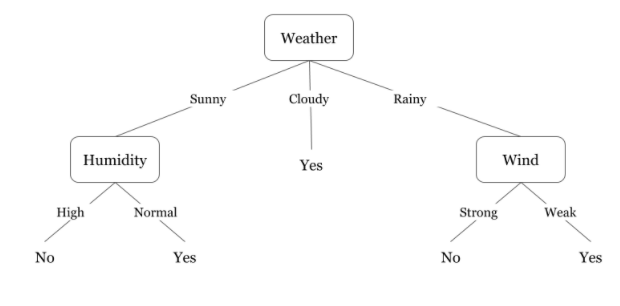

<h1>Geometric Intuition of Decision Trees</h1>

<br> Decision Trees divides the space into set of axis parallel hyperplanes that breaks the space into hypercubes, hypercuboids</br>
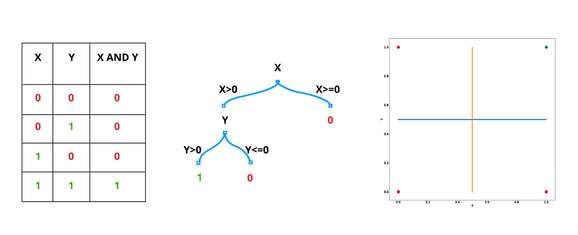

<h1>Key Terms for Building Decision Tree</h1>

<p>
    
    1) Entropy
    
    2) Information Gain
    
    3) Gini Impurity
</p>

<h2>Entropy</h2>

<p> In Layman's terms, Entropy is a measure of disorder </p>

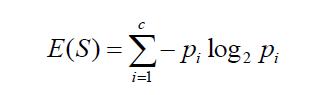

<p> <br>p(i) refers to the probability of the class of the point in the total dataset<br>

<br>Consider, there are 30 positive points and 70 negative points in a dataset.
The Entropy value would be (-(3/10)* log2(3/10)-(7/10)* log2(7/10)) = 0.88 <br>
<br>0.88 considered as high entropy, for two class classification problem,entropy lies between 0 and 1<br>
<br>If the entropy value is low, one class is significantly more than others or it may be a pure node<br>
![](https://miro.medium.com/max/500/1*M15RZMSk8nGEyOnD8haF-A.png)
<br>So, we know that entropy is a measure of disorder or uncertainty and our goal is to minimize the uncertainty. So, low entropy is maintained<br>

<h2>Information Gain</h2>

<p> <br>Information gain is how much information we gain when splitting the node into two parts<br>
    </p>

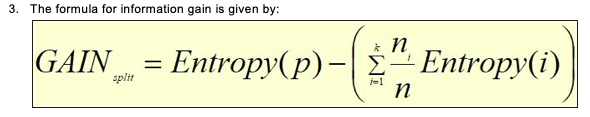

<h2>Constructing a decision tree</h2>

In [ ]:
df

<h3>Choosing the root node</h3>

There are four features,

1) Outlook
    
2) Temperature
    
3) Humidity
    
4) Wind


Out of these four which one to take as root node ?

Here comes, **Information Gain**

In [ ]:
'''#Step-1 : Calculate Entropy of total dataset
import math
def calculate_entropy(df,target,feature='None',value='None'):
    value_array,loop_var=df[target].unique(),len(df[target].unique())
    Entropy=0
    if feature=='None':
        for i in range(0,loop_var):
            prob = len(df[df[target]==value_array[i]])/len(df)
            if prob!=0:
                Entropy +=  (-prob * (math.log(prob,2)))
    else:
        df_i = df[df[feature]==value]
        for i in range(0,loop_var):
            prob = len(df_i[df_i[target]==value_array[i]])/len(df_i)
            if prob!=0:
                Entropy += (-prob * (math.log(prob,2)))
            
    return Entropy
'''

In [ ]:
import math
def calculate_entropy(df,target,feature='None',value='None'):
    value_array,loop_var=df[target].unique(),len(df[target].unique())
    Entropy=0
    if feature=='None':
        for i in range(0,loop_var):
            prob = len(df[df[target]==value_array[i]])/len(df)
            if prob!=0:
                Entropy +=  (-prob * (math.log(prob,2)))
    else:
        df = df[df[feature]==value]
        for i in range(0,loop_var):
            val=len(df)
            if val==0:
                val=1
            prob = len(df[df[target]==value_array[i]])/val
            if prob!=0:
                Entropy += (-prob * (math.log(prob,2)))
            
    return Entropy

In [ ]:
calculate_entropy(df,'play')

Since four faeatures are there, we are going to calculate Information Gain on all the four features


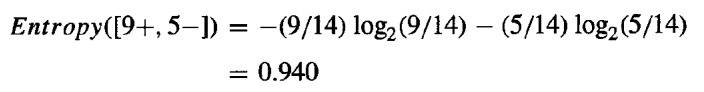

<h3> IG(Play, Outlook)</h3>

In [ ]:
df['outlook'].value_counts()

In [ ]:
df[df['outlook']=='Sunny']



In [ ]:
df[df['outlook']=='Overcast']


In [ ]:
df[df['outlook']=='Rain']

In [ ]:
IG_Outlook = calculate_entropy(df,'play') - ((len(df[df['outlook']=='Sunny'])/len(df))*calculate_entropy(df,'play','outlook','Sunny')
                                          + (len(df[df['outlook']=='Overcast'])/len(df))*calculate_entropy(df,'play','outlook','Overcast')
                                          +(len(df[df['outlook']=='Rain'])/len(df))*calculate_entropy(df,'play','outlook','Rain'))

IG_Outlook

<h3>IG(Play, temp)</h3>

In [ ]:
df['temp'].value_counts()

In [ ]:
df[df['temp']=='Mild']

In [ ]:
df[df['temp']=='Cool']

In [ ]:
df[df['temp']=='Hot']

In [ ]:
IG_Temp = calculate_entropy(df,'play') - ((len(df[df['temp']=='Hot'])/len(df))*calculate_entropy(df,'play','temp','Hot')
                                          + (len(df[df['temp']=='Mild'])/len(df))*calculate_entropy(df,'play','temp','Mild')
                                          +(len(df[df['temp']=='Cool'])/len(df))*calculate_entropy(df,'play','temp','Cool'))

IG_Temp

<h3>IG(Play,humidity)</h3>

In [ ]:
df['humidity'].value_counts()

In [ ]:
df[df['humidity']=='High']

In [ ]:
df[df['humidity']=='Normal']

In [ ]:
IG_Humidity = calculate_entropy(df,'play') - ((len(df[df['humidity']=='High'])/len(df))*calculate_entropy(df,'play','humidity','High')
                                          + (len(df[df['humidity']=='Normal'])/len(df))*calculate_entropy(df,'play','humidity','Normal')
                                          )

IG_Humidity

<h3>IG(Play,wind)</h3>

In [ ]:
df['wind'].value_counts()

In [ ]:
df[df['wind']=='Weak']

In [ ]:
df[df['wind']=='Strong']

In [ ]:
IG_Wind = calculate_entropy(df,'play') - ((len(df[df['wind']=='Weak'])/len(df))*calculate_entropy(df,'play','wind','Weak')
                                          + (len(df[df['wind']=='Strong'])/len(df))*calculate_entropy(df,'play','wind','Strong')
                                          )

IG_Wind

In [ ]:
print(IG_Outlook,IG_Temp,IG_Humidity,IG_Wind)

<p> Out of these four features, when we split our dataset into leaf nodes based on outlook will have high information gain<p>
    
<br> So, we will be splitting based on outlook feature<br>

After splitting based on outlook, we will have three nodes

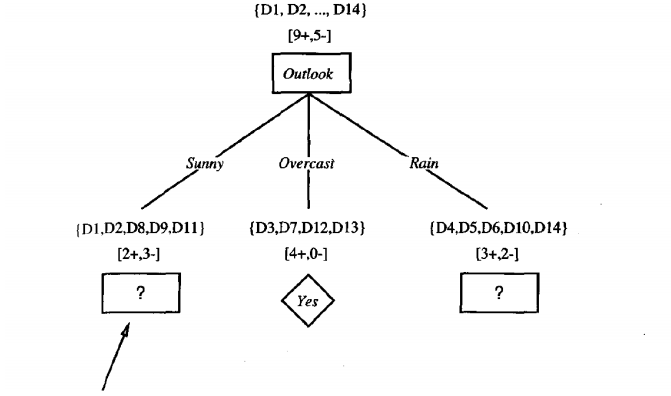

In [ ]:
df1 = df[df['outlook']=='Sunny']
df1

In [ ]:
IG_Outlook = calculate_entropy(df1,'play') - ((len(df1[df1['outlook']=='Sunny'])/len(df1))*calculate_entropy(df1,'play','outlook','Sunny')
                                          + (len(df1[df1['outlook']=='Overcast'])/len(df1))*calculate_entropy(df1,'play','outlook','Overcast')
                                          +(len(df1[df1['outlook']=='Rain'])/len(df1))*calculate_entropy(df1,'play','outlook','Rain'))

IG_Outlook

In [ ]:
IG_Temp = calculate_entropy(df1,'play') - ((len(df1[df1['temp']=='Hot'])/len(df1))*calculate_entropy(df1,'play','temp','Hot')
                                          + (len(df1[df1['temp']=='Mild'])/len(df1))*calculate_entropy(df1,'play','temp','Mild')
                                          +(len(df1[df1['temp']=='Cool'])/len(df1))*calculate_entropy(df1,'play','temp','Cool'))

IG_Temp

In [ ]:
IG_Humidity = calculate_entropy(df1,'play') - ((len(df1[df1['humidity']=='High'])/len(df1))*calculate_entropy(df1,'play','humidity','High')
                                          + (len(df1[df1['humidity']=='Normal'])/len(df1))*calculate_entropy(df1,'play','humidity','Normal')
                                          )

IG_Humidity

In [ ]:
IG_Wind = calculate_entropy(df1,'play') - ((len(df1[df1['wind']=='Weak'])/len(df1))*calculate_entropy(df1,'play','wind','Weak')
                                          + (len(df1[df1['wind']=='Strong'])/len(df1))*calculate_entropy(df1,'play','wind','Strong')
                                          )

IG_Wind

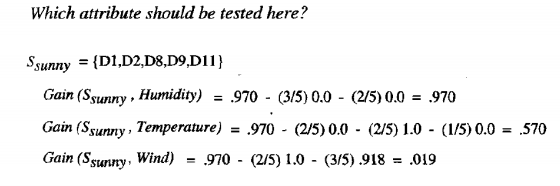

In [ ]:
df3 = df1[df1['humidity']=='High']
df3

In [ ]:
df4 = df1[df1['humidity']=='Normal']
df4

In [ ]:
df2 = df[df['outlook']=='Rain']
df2

In [ ]:
IG_Temp = calculate_entropy(df2,'play') - ((len(df2[df2['temp']=='Hot'])/len(df2))*calculate_entropy(df2,'play','temp','Hot')
                                          + (len(df2[df2['temp']=='Mild'])/len(df2))*calculate_entropy(df2,'play','temp','Mild')
                                          +(len(df2[df2['temp']=='Cool'])/len(df2))*calculate_entropy(df2,'play','temp','Cool'))

IG_Temp

In [ ]:
IG_Wind = calculate_entropy(df2,'play') - ((len(df2[df2['wind']=='Weak'])/len(df2))*calculate_entropy(df2,'play','wind','Weak')
                                          + (len(df2[df2['wind']=='Strong'])/len(df2))*calculate_entropy(df2,'play','wind','Strong')
                                          )

IG_Wind

In [ ]:
IG_Humidity = calculate_entropy(df2,'play') - ((len(df2[df2['humidity']=='High'])/len(df2))*calculate_entropy(df2,'play','humidity','High')
                                          + (len(df2[df2['humidity']=='Normal'])/len(df2))*calculate_entropy(df2,'play','humidity','Normal')
                                          )

IG_Humidity

In [ ]:
df5 = df2[df2['wind']=='Weak']
df5

In [ ]:
df6 = df2[df2['wind']=='Strong']
df6

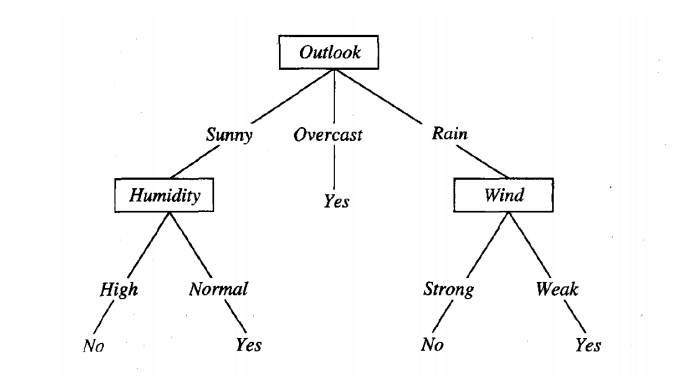

<h3>Overfitting, Underfitting</h3>

<br> Overfitting refers to the performance of model, which is very best in Training data and poor in testing data<br>
<br>The model literally memorize the datapoints and its classes, so whenever new question comes it doesn't know the answer<br>

<br> Underfitting is when a model doesn't perform well on Train data and testing data also, a dumb model<br>

<br> Overfitting occurs in decision tree, when there is too much depth in a tree, our destination is to reach pure nodes, but whenever the pure node case isn't possible, without achieving the optimal depth, we can stop with small no of points in other classes. Those small number of points can be outliers too. In real world data, outliers can't be avoided<br>

<h3>Cases for Decision tree</h3>

<h4>Imbalanced Data</h4>

Since the trees are splitted into leaf nodes based on the sample size of the class, we need to overcome the problem of imbalanced dataset

If the dataset is imbalanced, we have to grow unlimited trees. Either we have to specify maximum depth or upsample/downsample the dataset until the number of points for all the classes are same

<h4> Large Dimensions</h4>

If there are many features in dataset, we have to calculate entropy, ig for all those features and we have to construct a tree.

Having much features and calculating Entropy, Information Gain of them will result in a higher train time complexity. Imagine having million rows and million features, your training phase will take days

so, to avoid this, we have to do feature importance or we have to remove unwanted features. There is other thing which results in large dimensionality of the dataset, which is converting categorical features into numerical.

If we convert categorical into numerical, using onehot encoding, it will increase dimensionalities. So we have to perform other means of encoding categorical data